In [1]:
library("tidyverse")
library("palmerpenguins")
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 3)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
penguins_long = penguins %>% pivot_longer(-c(species, island, sex, year)) %>% drop_na()
penguins_long %>% head

species,island,sex,year,name,value
<fct>,<fct>,<fct>,<int>,<chr>,<dbl>
Adelie,Torgersen,male,2007,bill_length_mm,39.1
Adelie,Torgersen,male,2007,bill_depth_mm,18.7
Adelie,Torgersen,male,2007,flipper_length_mm,181.0
Adelie,Torgersen,male,2007,body_mass_g,3750.0
Adelie,Torgersen,female,2007,bill_length_mm,39.5
Adelie,Torgersen,female,2007,bill_depth_mm,17.4


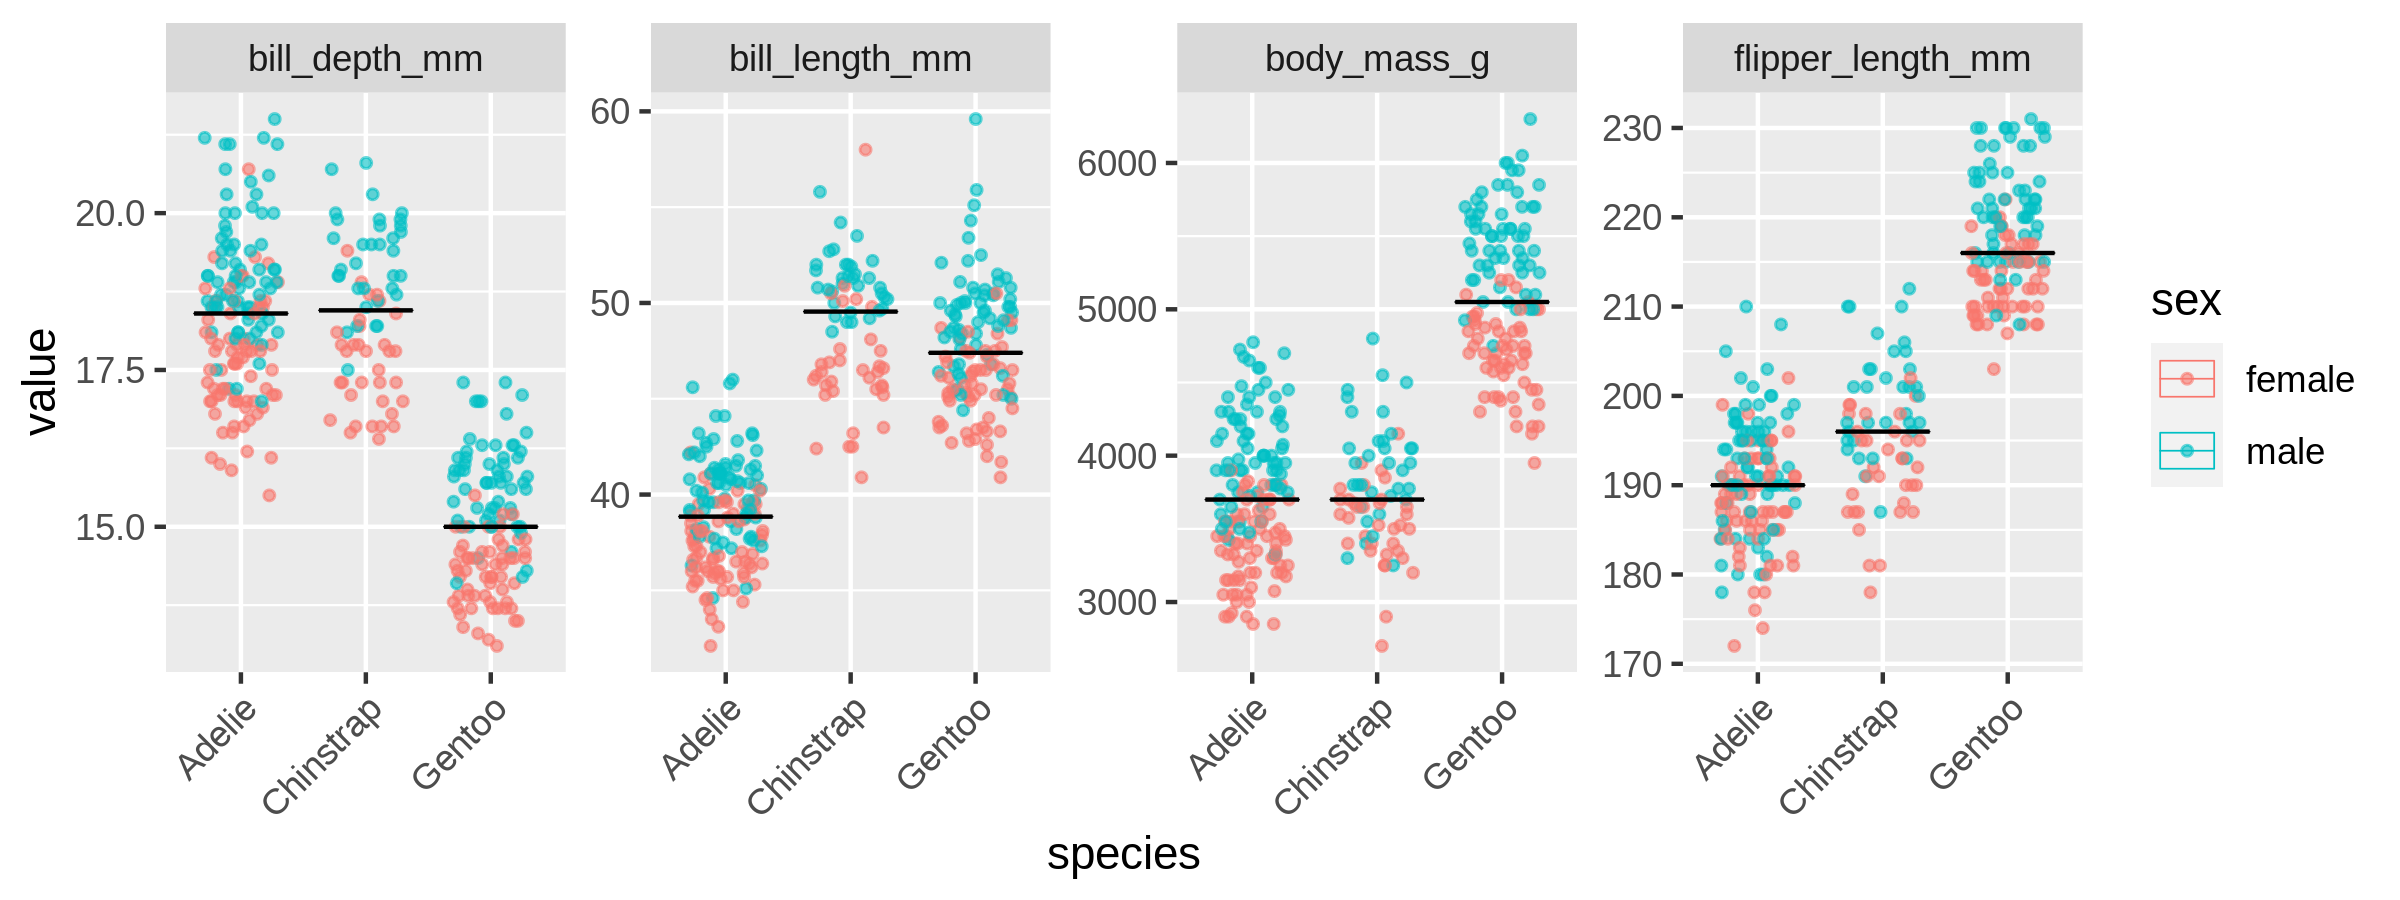

In [3]:
p = ggplot(penguins_long, aes(x = species, y = value, color = sex)) +
        geom_point(position = position_jitter(w = .3, h = 0), alpha = .6, size = .9) +
        facet_wrap(~name, scales = "free_y", nrow = 1) +
        stat_summary(fun = median, 
                     fun.min = median, 
                     fun.max = median, 
                     geom = "crossbar", 
                     width = 0.75, 
                     size = 0.2,
                     mapping = aes(group = species)) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
p